In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

# Initial imports
from pathlib import Path
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

%matplotlib inline

In [2]:
csv_path = Path('../Project-03/combined_df.csv')
teamstats_df = pd.read_csv(csv_path)

In [3]:
teamstats_df = teamstats_df.drop(columns=['Unnamed: 0'])

In [4]:
teamstats_df['GAMEDATE'] = pd.to_datetime(teamstats_df['GAMEDATE'])
teamstats_df['GAMEDATE.1'] = pd.to_datetime(teamstats_df['GAMEDATE.1'])

In [5]:
teamstats_df.shape

(12738, 52)

In [6]:
# converting 'W/L' to 0/1's
teamstats_df['H_W/L']=teamstats_df['H_W/L'].apply(lambda x: 1 if x=="W" else 0)
teamstats_df['A_W/L']=teamstats_df['A_W/L'].apply(lambda x: 1 if x=="W" else 0)
teamstats_df[:5]

,H_TEAM,H_TEAM1,H_H/A,H_TEAM2,GAMEDATE,H_W/L,H_MIN,H_PTS,H_FGM,H_FGA,...,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF,A_+/-
0,ATL,ATL,vs,SAS,2021-04-18,1,53,114,42,92,...,86.4,9,38,47,27,12,5,6,21,-2
1,ATL,ATL,vs,GSW,2021-04-18,0,48,100,37,80,...,68.0,13,34,47,30,21,15,7,17,1
2,ATL,ATL,vs,IND,2021-04-18,1,48,116,42,82,...,82.9,13,26,39,24,11,8,4,24,-5
3,ATL,ATL,vs,MIA,2021-04-18,0,63,109,36,94,...,78.3,14,42,56,25,22,6,6,35,7
4,ATL,ATL,vs,BOS,2021-04-18,0,48,81,28,68,...,66.7,16,28,44,27,13,11,4,15,8


In [7]:
# converting 'H/A' to 0/1's
teamstats_df['H_H/A'] = teamstats_df['H_H/A'].apply(lambda x: 1 if x=="vs" else 0)
teamstats_df['A_H/A'] = teamstats_df['A_H/A'].apply(lambda x: 1 if x=="vs" else 0)

teamstats_df[:5]

,H_TEAM,H_TEAM1,H_H/A,H_TEAM2,GAMEDATE,H_W/L,H_MIN,H_PTS,H_FGM,H_FGA,...,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF,A_+/-
0,ATL,ATL,1,SAS,2021-04-18,1,53,114,42,92,...,86.4,9,38,47,27,12,5,6,21,-2
1,ATL,ATL,1,GSW,2021-04-18,0,48,100,37,80,...,68.0,13,34,47,30,21,15,7,17,1
2,ATL,ATL,1,IND,2021-04-18,1,48,116,42,82,...,82.9,13,26,39,24,11,8,4,24,-5
3,ATL,ATL,1,MIA,2021-04-18,0,63,109,36,94,...,78.3,14,42,56,25,22,6,6,35,7
4,ATL,ATL,1,BOS,2021-04-18,0,48,81,28,68,...,66.7,16,28,44,27,13,11,4,15,8


In [8]:
teamstats_df.shape

(12738, 52)

In [9]:
teamstats_df = teamstats_df.drop(['H_TEAM','A_TEAM','GAMEDATE','GAMEDATE.1'], axis=1)

In [26]:
# separate non numeric data into separate dataframe
dummy_teamstats_df = teamstats_df[['H_TEAM1','H_TEAM2','A_TEAM1','A_TEAM2']].copy()
teamstats_df =teamstats_df.drop(['H_TEAM1','H_TEAM2','A_TEAM1','A_TEAM2'], axis=1)

In [29]:
# perform get_dummies on non numeric data
dummy_teamstats_df = pd.get_dummies(dummy_teamstats_df, columns=['H_TEAM1','H_TEAM2','A_TEAM1','A_TEAM2'])

In [30]:
# defining 'W/L' column as feature set
X = teamstats_df.copy()
X.drop('H_W/L', axis=1, inplace=True)
X.head(16)

,H_H/A,H_MIN,H_PTS,H_FGM,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,H_FTM,...,A_FT%,A_OREB,A_DREB,A_REB,A_AST,A_TOV,A_STL,A_BLK,A_PF,A_+/-
0,1,53,114,42,92,45.7,14,28,50.0,16,...,86.4,9,38,47,27,12,5,6,21,-2
1,1,48,100,37,80,46.3,10,31,32.3,16,...,68.0,13,34,47,30,21,15,7,17,1
2,1,48,116,42,82,51.2,10,32,31.3,22,...,82.9,13,26,39,24,11,8,4,24,-5
3,1,63,109,36,94,38.3,6,22,27.3,31,...,78.3,14,42,56,25,22,6,6,35,7
4,1,48,81,28,68,41.2,10,29,34.5,15,...,66.7,16,28,44,27,13,11,4,15,8
5,1,48,101,37,87,42.5,15,39,38.5,12,...,91.7,11,35,46,20,9,7,6,20,6
6,1,48,106,43,91,47.3,10,24,41.7,10,...,55.6,12,29,41,23,14,11,7,17,-24
7,1,48,115,35,77,45.5,18,39,46.2,27,...,74.1,7,34,41,27,4,4,6,23,8
8,1,48,109,47,83,56.6,9,12,75.0,6,...,80.0,17,26,43,21,20,8,5,9,-15
9,1,48,96,32,72,44.4,13,25,52.0,19,...,100.0,8,31,39,20,21,10,4,21,-10


In [31]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [32]:
# defining target vector
#y=new_teamstats_df['H_W/L'].values.reshape(-1,1)
# defining target vector
y=teamstats_df['H_W/L'].ravel()
y[:5]

array([1, 0, 1, 0, 0], dtype=int64)

In [33]:
teamstats_df.shape

(12738, 44)

In [34]:
dummy_teamstats_df.shape

(12738, 158)

In [38]:
new_teamstats_df = pd.concat([teamstats_df, dummy_teamstats_df], axis=1)

In [39]:
new_teamstats_df.head()

,H_H/A,H_W/L,H_MIN,H_PTS,H_FGM,H_FGA,H_FG%,H_3PM,H_3PA,H_3P%,...,A_TEAM2_OKC,A_TEAM2_ORL,A_TEAM2_PHI,A_TEAM2_PHX,A_TEAM2_POR,A_TEAM2_SAC,A_TEAM2_SAS,A_TEAM2_TOR,A_TEAM2_UTA,A_TEAM2_WAS
0,1,1,53,114,42,92,45.7,14,28,50.0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,48,100,37,80,46.3,10,31,32.3,...,0,0,0,0,0,0,0,0,0,0
2,1,1,48,116,42,82,51.2,10,32,31.3,...,0,0,0,0,0,0,0,0,0,0
3,1,0,63,109,36,94,38.3,6,22,27.3,...,0,0,0,0,0,0,0,0,0,0
4,1,0,48,81,28,68,41.2,10,29,34.5,...,0,0,0,0,0,0,0,0,0,0


In [41]:
new_teamstats_df.to_csv('new_teamstats_df.csv')

In [42]:
new_teamstats_df.shape

(12738, 202)

In [45]:
# Create the features (X) and target (y) sets
X = new_teamstats_df.iloc[:, 0:202].values
y = new_teamstats_df['H_W/L'].values

In [46]:
print(type(X))

<class 'numpy.ndarray'>


In [47]:
# Scale the data
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler().fit(X)
X = scaler.transform(X)

In [48]:
# Define the model - shallow neural net
number_hidden_nodes = 8
number_input_features = 202

nn = Sequential()
# Hidden layer
nn.add(
    Dense(units=number_hidden_nodes, input_dim=number_input_features, activation="relu")
)
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [49]:
 # Compile the model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Train the model
model_1 = nn.fit(X, y, validation_split=0.3, epochs=100)

Epoch 1/100
279/279 [==============================] - 1s 2ms/step - loss: 0.6476 - mse: 0.6476 - val_loss: 0.6275 - val_mse: 0.6275
Epoch 2/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0769 - mse: 0.0769 - val_loss: 0.4049 - val_mse: 0.4049
Epoch 3/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0285 - mse: 0.0285 - val_loss: 0.3366 - val_mse: 0.3366
Epoch 4/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0134 - mse: 0.0134 - val_loss: 0.3178 - val_mse: 0.3178
Epoch 5/100
279/279 [==============================] - 0s 2ms/step - loss: 0.0073 - mse: 0.0073 - val_loss: 0.3224 - val_mse: 0.3224
Epoch 6/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0043 - mse: 0.0043 - val_loss: 0.3278 - val_mse: 0.3278
Epoch 7/100
279/279 [==============================] - 0s 1ms/step - loss: 0.0025 - mse: 0.0025 - val_loss: 0.3361 - val_mse: 0.3361
Epoch 8/100
279/279 [==============================] - 0s 1ms/step - 

279/279 [==============================] - 0s 1ms/step - loss: 7.5722e-05 - mse: 7.5722e-05 - val_loss: 0.0668 - val_mse: 0.0668
Epoch 60/100
279/279 [==============================] - 0s 1ms/step - loss: 1.8385e-04 - mse: 1.8385e-04 - val_loss: 0.0705 - val_mse: 0.0705
Epoch 61/100
279/279 [==============================] - 0s 1ms/step - loss: 5.5887e-05 - mse: 5.5887e-05 - val_loss: 0.0717 - val_mse: 0.0717
Epoch 62/100
279/279 [==============================] - 0s 1ms/step - loss: 1.1825e-04 - mse: 1.1825e-04 - val_loss: 0.0765 - val_mse: 0.0765
Epoch 63/100
279/279 [==============================] - 0s 1ms/step - loss: 7.7091e-05 - mse: 7.7091e-05 - val_loss: 0.0812 - val_mse: 0.0812
Epoch 64/100
279/279 [==============================] - 0s 1ms/step - loss: 7.7154e-05 - mse: 7.7154e-05 - val_loss: 0.0821 - val_mse: 0.0821
Epoch 65/100
279/279 [==============================] - 0s 1ms/step - loss: 2.0855e-04 - mse: 2.0855e-04 - val_loss: 0.0825 - val_mse: 0.0825
Epoch 66/100
279/27

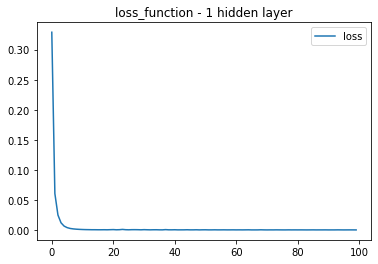

In [50]:
# Plot the train and test loss function
plt.plot(model_1.history["loss"])
plt.title("loss_function - 1 hidden layer")
plt.legend(["loss"])
plt.show()

In [52]:
# Define the model - deep neural net
number_input_features = 202
hidden_nodes_layer1 = 8
hidden_nodes_layer2 = 4

nn = Sequential()
# First hidden layer
nn.add(
    Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu")
)
# Second hidden layer
nn.add(Dense(units=hidden_nodes_layer2, activation="relu"))
# Output layer
nn.add(Dense(units=1, activation="linear"))

In [54]:
# Compile model
nn.compile(loss="mean_squared_error", optimizer="adam", metrics=["mse"])

# Fit the model
model_2 = nn.fit(X, y, validation_split=0.3, epochs=100)

Epoch 1/100
279/279 [==============================] - 1s 2ms/step - loss: 4.3154e-06 - mse: 4.3154e-06 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 2/100
279/279 [==============================] - 0s 2ms/step - loss: 2.6686e-08 - mse: 2.6686e-08 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 3/100
279/279 [==============================] - 1s 2ms/step - loss: 4.5686e-08 - mse: 4.5686e-08 - val_loss: 0.0015 - val_mse: 0.0015
Epoch 4/100
279/279 [==============================] - 0s 2ms/step - loss: 3.1827e-07 - mse: 3.1827e-07 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 5/100
279/279 [==============================] - 0s 2ms/step - loss: 7.4992e-07 - mse: 7.4992e-07 - val_loss: 9.6127e-04 - val_mse: 9.6127e-04
Epoch 6/100
279/279 [==============================] - 1s 2ms/step - loss: 3.1723e-08 - mse: 3.1723e-08 - val_loss: 9.5022e-04 - val_mse: 9.5022e-04
Epoch 7/100
279/279 [==============================] - 1s 2ms/step - loss: 6.8030e-12 - mse: 6.8030e-12 - val_loss: 9.5029e-04 - val_mse: 

Epoch 56/100
279/279 [==============================] - 0s 2ms/step - loss: 8.3699e-16 - mse: 8.3699e-16 - val_loss: 9.2104e-04 - val_mse: 9.2104e-04
Epoch 57/100
279/279 [==============================] - 0s 2ms/step - loss: 4.3346e-15 - mse: 4.3346e-15 - val_loss: 9.2104e-04 - val_mse: 9.2104e-04
Epoch 58/100
279/279 [==============================] - 0s 2ms/step - loss: 1.6792e-14 - mse: 1.6792e-14 - val_loss: 9.2104e-04 - val_mse: 9.2104e-04
Epoch 59/100
279/279 [==============================] - 0s 2ms/step - loss: 3.9704e-13 - mse: 3.9704e-13 - val_loss: 9.2104e-04 - val_mse: 9.2104e-04
Epoch 60/100
279/279 [==============================] - 0s 2ms/step - loss: 8.8970e-14 - mse: 8.8970e-14 - val_loss: 9.2104e-04 - val_mse: 9.2104e-04
Epoch 61/100
279/279 [==============================] - 0s 2ms/step - loss: 5.8436e-13 - mse: 5.8436e-13 - val_loss: 9.2117e-04 - val_mse: 9.2117e-04
Epoch 62/100
279/279 [==============================] - 0s 2ms/step - loss: 1.6679e-07 - mse: 1.6679

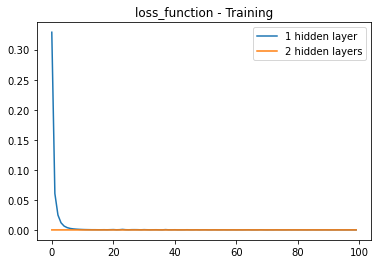

In [55]:
plt.plot(model_1.history["loss"])
plt.plot(model_2.history["loss"])
plt.title("loss_function - Training")
plt.legend(["1 hidden layer", "2 hidden layers"])
plt.show()

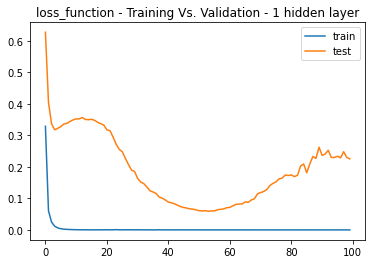

In [56]:
# Train vs test for shallow net
plt.plot(model_1.history["loss"])
plt.plot(model_1.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 1 hidden layer")
plt.legend(["train", "test"])
plt.show()

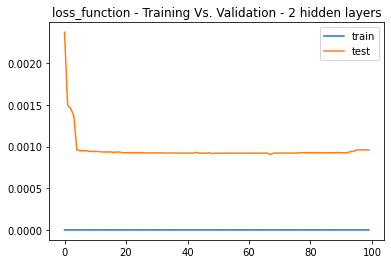

In [57]:
# Train vs test for deep net
plt.plot(model_2.history["loss"])
plt.plot(model_2.history["val_loss"])
plt.title("loss_function - Training Vs. Validation - 2 hidden layers")
plt.legend(["train", "test"])
plt.show()